In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Polybench Experimental Results

This notebook puts together how we run Polybench experiments using the `pb-flow` script, and how we process the run results to get the formatted table.

## Setup

We need to put the `python/` directory into the `PYTHONPATH`. 

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [3]:
from pyphism.polybench import pb_flow

In [4]:
len(pb_flow.discover_examples('./example/polybench'))

30

In [11]:
options = {
  "baseline": pb_flow.PbFlowOptions(
    pb_dir=os.path.join(pb_flow.get_project_root(), 'example', 'polybench'),
    work_dir=os.path.join(pb_flow.get_project_root(), 'tmp', 'phism', 'pb-flow.small.baseline'),
    job=30,
    polymer=False,
    cosim=True,
    debug=True,
    dataset='SMALL',
    cleanup=False,
    loop_transforms=False,
    improve_pipelining=False,
  ),
  "polymer": pb_flow.PbFlowOptions(
    pb_dir=os.path.join(pb_flow.get_project_root(), 'example', 'polybench'),
    work_dir=os.path.join(pb_flow.get_project_root(), 'tmp', 'phism', 'pb-flow.small.polymer'),
    job=30,
    polymer=True,
    cosim=True,
    debug=True,
    dataset='SMALL',
    cleanup=False,
    loop_transforms=True,
  ),
}

## Run `pb-flow`

In [ ]:
pb_flow.pb_flow_runner(options["baseline"])

>>> Starting 30 jobs (work_dir=/mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.baseline) ...
>>> Finished nussinov        elapsed: 128.511995 secs   Status: 0  Error: "No Error"
>>> Finished trmm            elapsed: 145.619500 secs   Status: 1  Error: "Phism syn failed."
>>> Finished floyd-warshall  elapsed: 156.708444 secs   Status: 0  Error: "No Error"
>>> gemver Attempting to fix cosim issues by CosimFixStrategy(phism_directives=[], tbgen_directives=['set_directive_interface kernel_gemver A -mode ap_memory -storage_type ram_1p']) ...
>>> Finished jacobi-1d       elapsed: 232.765012 secs   Status: 0  Error: "No Error"
>>> syrk Attempting to fix cosim issues by CosimFixStrategy(phism_directives=[], tbgen_directives=['set_directive_interface kernel_syrk C -mode ap_memory -storage_type ram_1p']) ...
>>> Finished bicg            elapsed: 240.986459 secs   Status: 0  Error: "No Error"
>>> Finished atax            elapsed: 243.070124 secs   Status: 0  Error: "No Error"
>>> Finished

In [46]:
pb_flow.pb_flow_runner(options["polymer"])

>>> Starting 30 jobs (work_dir=/mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.small.polymer) ...
>>> Finished nussinov        elapsed: 72.979260 secs   Status: 0  Error: "No Error"
>>> Finished durbin          elapsed: 124.053848 secs   Status: 0  Error: "No Error"
>>> Finished trisolv         elapsed: 128.499889 secs   Status: 0  Error: "No Error"
>>> Finished floyd-warshall  elapsed: 131.582438 secs   Status: 0  Error: "No Error"
>>> Finished gesummv         elapsed: 137.704192 secs   Status: 0  Error: "No Error"
>>> Finished jacobi-1d       elapsed: 146.496184 secs   Status: 0  Error: "No Error"
>>> Finished mvt             elapsed: 174.490997 secs   Status: 0  Error: "No Error"
>>> Finished trmm            elapsed: 175.314189 secs   Status: 0  Error: "No Error"
>>> Finished bicg            elapsed: 176.404163 secs   Status: 0  Error: "No Error"
>>> Finished atax            elapsed: 177.125251 secs   Status: 0  Error: "No Error"
>>> Finished doitgen         elapsed: 177.862

Process ForkPoolWorker-132:
Process ForkPoolWorker-136:
Process ForkPoolWorker-126:
Process ForkPoolWorker-123:
Process ForkPoolWorker-130:
Process ForkPoolWorker-127:
Process ForkPoolWorker-141:
Process ForkPoolWorker-142:
Process ForkPoolWorker-146:
Process ForkPoolWorker-137:
Process ForkPoolWorker-144:
Process ForkPoolWorker-122:
Process ForkPoolWorker-150:
Process ForkPoolWorker-147:
Process ForkPoolWorker-149:
Process ForkPoolWorker-145:
Process ForkPoolWorker-139:
Process ForkPoolWorker-135:
Process ForkPoolWorker-140:
Process ForkPoolWorker-133:
Process ForkPoolWorker-138:
Process ForkPoolWorker-129:
Process ForkPoolWorker-121:
Process ForkPoolWorker-128:
Process ForkPoolWorker-134:
Process ForkPoolWorker-148:
Process ForkPoolWorker-143:
Process ForkPoolWorker-125:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceb

KeyboardInterrupt: 

## Results

Here we list all the results as a table.

In [12]:
baseline = pb_flow.to_pandas(pb_flow.process_pb_flow_result_dir(options['baseline'].work_dir, options['baseline']))
baseline

,name,status,latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,2mm,SUCCESS,920258,42,9887,7428,0,0,4272,850560,425280,2160,80
1,3mm,SUCCESS,1810535,32,11509,11388,0,0,4272,850560,425280,2160,80
2,adi,SUCCESS,603921,56,50232,35944,0,0,4272,850560,425280,2160,80
3,atax,SUCCESS,31911,14,1675,2626,0,0,4272,850560,425280,2160,80
4,bicg,SUCCESS,86435,15,1760,1509,0,0,4272,850560,425280,2160,80
5,cholesky,SUCCESS,1974719,14,1898,2207,0,0,4272,850560,425280,2160,80
6,correlation,SUCCESS,1966636,14,3034,4560,0,0,4272,850560,425280,2160,80
7,covariance,SUCCESS,493598,14,2287,3412,0,0,4272,850560,425280,2160,80
8,deriche,SUCCESS,None,None,None,None,None,None,None,None,None,None,None
9,doitgen,SUCCESS,325001,29,9994,5059,0,0,4272,850560,425280,2160,80


In [13]:
polymer = pb_flow.to_pandas(pb_flow.process_pb_flow_result_dir(options['polymer'].work_dir, options['polymer']))
polymer

,name,status,latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,2mm,SUCCESS,180661,437,26650,34574,0,0,4272,850560,425280,2160,80
1,3mm,SUCCESS,None,98,5718,12251,0,0,4272,850560,425280,2160,80
2,adi,SUCCESS,1656239,90,16387,14686,0,0,4272,850560,425280,2160,80
3,atax,SUCCESS,57507,144,14028,17597,0,0,4272,850560,425280,2160,80
4,bicg,SUCCESS,44058,144,14011,17571,0,0,4272,850560,425280,2160,80
5,cholesky,SUCCESS,2262920,18,4994,7091,0,0,4272,850560,425280,2160,80
6,correlation,SUCCESS,2150939,71,9184,12030,0,0,4272,850560,425280,2160,80
7,covariance,SUCCESS,2019108,37,6083,8255,0,0,4272,850560,425280,2160,80
8,deriche,SUCCESS,1426119,23,4535,5394,0,0,4272,850560,425280,2160,80
9,doitgen,SUCCESS,710002,15,3931,2974,0,0,4272,850560,425280,2160,80


In [14]:
from collections import defaultdict

base_succ = pb_flow.filter_success(baseline)
poly_succ = pb_flow.filter_success(polymer)

names = sorted(list(set(base_succ['name']) & set(poly_succ['name'])))

data = defaultdict(list)

for name in names:
  data['name'].append(name)

  data['base_lat'].append(base_succ[base_succ['name'] == name]['latency'].values[0])
  data['poly_lat'].append(poly_succ[poly_succ['name'] == name]['latency'].values[0])

df = pd.DataFrame(data)
df = df.dropna()
df['speedup'] = (df['base_lat'] / df['poly_lat'])
df['poly_lat'] = [int(val) for val in df['poly_lat'].values]
df['base_lat'] = [int(val) for val in df['base_lat'].values]
df

,name,base_lat,poly_lat,speedup
0,2mm,920258,180661,5.093839
2,adi,603921,1656239,0.364634
3,atax,31911,57507,0.554906
4,bicg,86435,44058,1.961846
5,cholesky,1974719,2262920,0.872642
6,correlation,1966636,2150939,0.914315
7,covariance,493598,2019108,0.244463
9,doitgen,325001,710002,0.457747
10,durbin,29276,52225,0.560574
11,fdtd-2d,570881,8838390,0.064591


In [19]:
df['speedup'].mean()

1.001118487330856

Text(0, 0.5, 'latency')

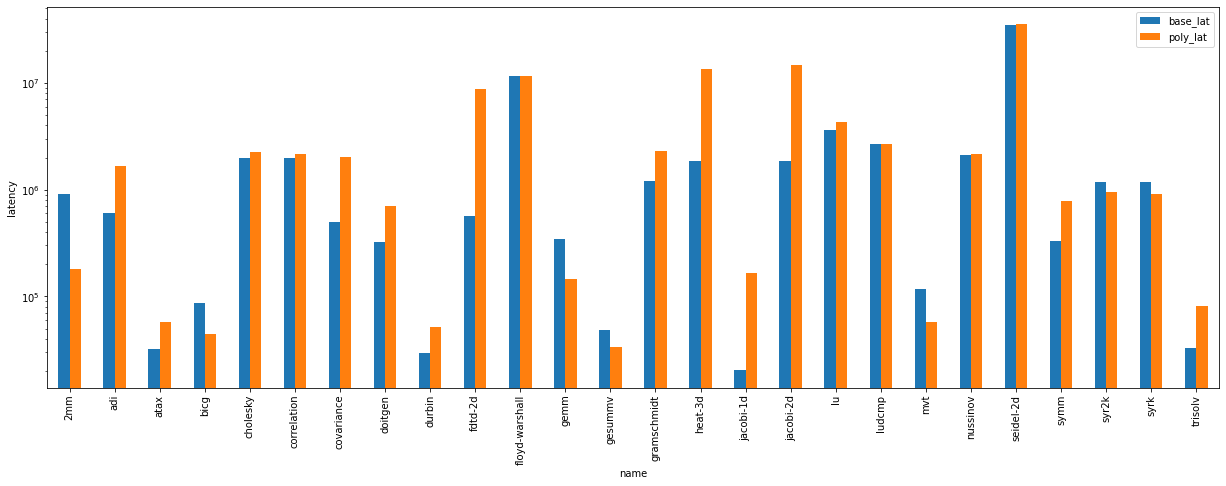

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

df.plot(x='name', y=['base_lat', 'poly_lat'], kind='bar', ax=ax)
ax.set_yscale('log')
ax.set_ylabel('latency')